In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
# 100 trials on same set of 2 frames (sensor noise re-applied for each trial)

#Spherical ICET
# fn1 = "MC_results/s1_spherical_ICET_estimates.npy" #MC?? 
# fn2 = "MC_results/s1_spherical_ICET_pred_stds.npy" #MC??
# Ground truth = [0.5, 0., 0., 0.0, 0.0, -0.05]
fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"

#Cart ICET (w/ GP)
# fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"

#Cart ICET (NO GP)


est = np.load(fn1)
pred_stds = np.load(fn2)
# print(est)

# print(np.mean(est, axis = 0))

# print(np.mean(pred_stds, axis = 0)[:3])
# print(np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.std(pred_stds, axis = 0)) #shows consistant prediction for soln std for constant scene

# MSE = np.mean((est - np.array([0.5, 0, 0, 0, 0, -0.05]))**2, axis = 0)
err = (est - np.array([0.5, 0, 0, 0, 0, -0.05])) #angular errors in rad
err[:,3:] = np.rad2deg(err[:,3:]) #convert angular errors to deg
RMSE = np.mean(np.sqrt(err**2), axis = 0)
print("\n RMSE \n", RMSE)

# pred_MSE = np.mean(pred_stds, axis = 0)**2
pred_RMSE = np.mean(pred_stds, axis = 0)
pred_RMSE[3:] = np.rad2deg(pred_RMSE[3:]) #convert rad2deg
print("\n pred_RMSE \n", pred_RMSE)

# print(est - np.array([0.5, 0, 0, 0, 0, 0.05]))


 RMSE 
 [0.00098232 0.00015396 0.00014483 0.00131564 0.00139507 0.00074493]

 pred_RMSE 
 [0.00103616 0.00018864 0.00013043 0.00171221 0.00164003 0.0010773 ]


In [27]:
#calc mean and std
mean = np.mean(est, axis = 0)
std = np.std(est, axis = 0)

print(mean, "\n")
print(std[:3])
print(np.rad2deg(std[3:]))

[ 5.00439718e-01 -4.39662124e-06 -1.05751892e-04  6.00283132e-06
 -1.24355357e-05 -4.99985381e-02] 

[0.00115976 0.00018834 0.0001469 ]
[0.00163076 0.00155259 0.00092138]


In [271]:
#40 frame trajectory (3 iterations each pair)
# Ground truth = [0.5, 0., 0., 0.0, 0.0, 0.05]

fn1 = "MC_results/traj1_cart_ICET_estimates_with_GP.npy" 
fn2 = "MC_results/traj1_cart_ICET_pred_stds_with_GP.npy"
# fn1 = "MC_results/traj1_cart_ICET_estimates_no_GP.npy" 
# fn2 = "MC_results/traj1_cart_ICET_pred_stds_no_GP.npy"
# fn1 = "MC_results/traj1_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj1_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_spherical_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_spherical_ICET_pred_stds.npy"
# fn1 = "MC_results/traj2_cart_ICET_estimates.npy" 
# fn2 = "MC_results/traj2_cart_ICET_pred_stds.npy"
est = np.load(fn1)
pred_stds = np.load(fn2)

# fn1 = "MC_results/traj1_cart_ICP_point2plane_NO_GP.txt" #ICP Point-to-Plane, zero initial conds
# fn1 = "MC_results/traj1_cart_ICP_point2plane_NO_GP_perfect_init.txt" #perfect initial guess
# fn1 = "MC_results/traj1_cart_ICP_point2point_NO_GP.txt" #ICP Point-to-Point
# fn1 = "MC_results/traj1_cart_NDT_NO_GP.txt" #NDT (from MatLab canned operation)
fn1 = "MC_results/traj1_cart_NDT_NO_GP_v2.txt" #NDT (from MatLab canned operation)
# fn1 = "MC_results/traj1_cart_NDT_NO_GP_OR_0.txt" #NDT with no outlier removal
# fn1 = "MC_results/traj1_cart_LOAM_NO_GP.txt" #LOAM
est = np.loadtxt(fn1)[:117]
# est = np.load("MC_results/traj1_spherical_NDT_estimates.npy") #NDT with spherical grid 
# est = est[:100]
# pred_stds = pred_stds[:100]
# est = np.loadtxt("MC_results/traj1_spherical_ICP_point2plane_NO_GP.txt")


#just consider first 100----------------------
# est = est[:100,:]
# pred_stds = pred_stds[:100,:]
#---------------------------------------------

before = np.shape(est)[0]

#get rid of high translation errors~~~~~~~
good = np.where(est[:,0] > 0.45) #0.35
est = est[good]
pred_stds = pred_stds[good]
good = np.where(est[:,0] < 0.55) #0.65
est = est[good]
pred_stds = pred_stds[good]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# #get rid of high yaw errors~~~~~~~~~~
# good = np.where(est[:,3] > (-0.051))
# est = est[good]
# pred_stds = pred_stds[good]
# good = np.where(est[:,3] < (-0.049))
# est = est[good]
# pred_stds = pred_stds[good]
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print(est[:,2])


# #get rid of high lane shift errors~~~
# good = np.where(est[:,1] < 0.05)
# est = est[good]
# pred_stds = pred_stds[good]
# good = np.where(est[:,1] > -0.05)
# est = est[good]
# pred_stds = pred_stds[good]
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#get rid of high rotation errors
# good = np.where(abs(est[:,5] < 0.08  ))
# est = est[good]
# pred_stds = pred_stds[good]
print("removed ", before - np.shape(est)[0], "outliers from ", before, "total estimates \n")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# print(est[:,5])
# print("Predicted STDs: \n",
#     np.mean(pred_stds, axis = 0)[:3], np.rad2deg(np.mean(pred_stds, axis = 0)[3:]))
# print(np.mean(pred_stds, axis = 0)[:3],np.mean(pred_stds, axis = 0)[3:])


# err = (est - np.array([0.5, 0, 0, 0, 0, -0.05])) #angular errors in rad #FOR ICET DATA
err = (est - np.array([0.5, 0, 0,-0.05, 0, 0])) #angular errors in rad #FOR MATLAB DATA
err[:,3:] = np.rad2deg(err[:,3:]) #convert angular errors to deg
RMSE = np.sqrt(np.mean(err**2, axis = 0))
# print(err[:,5])
print("\n RMSE \n", RMSE)

# pred_MSE = np.mean(pred_stds, axis = 0)**2
pred_RMSE = np.mean(pred_stds, axis = 0)
pred_RMSE[3:] = np.rad2deg(pred_RMSE[3:]) #convert rad2deg
# print("\n pred_RMSE \n", pred_RMSE)


[0.04680599 0.04180174 0.04473655 0.0492689  0.04413843 0.04390045
 0.04247766 0.04409781 0.04422602 0.04413026 0.04011131 0.03496147
 0.0398782  0.04022336 0.04425139 0.03335984 0.04209519 0.04510352
 0.04268805 0.0421977  0.04124287 0.04155003 0.04052631 0.04500314
 0.04286997 0.04537932 0.04030258 0.03935112 0.04289123 0.04499057
 0.04191872 0.04165515 0.04389528 0.04127233 0.03920846 0.0428537
 0.04198664 0.04421059 0.04256133 0.04600614 0.04051197 0.04321535
 0.04631262 0.04395519 0.04003323 0.04031538 0.03114247 0.03467889
 0.04487476 0.043714   0.04071091 0.04154426 0.04465629 0.04297659
 0.04672642 0.04174717 0.04045279 0.03896572 0.04066894 0.04051639
 0.04015159 0.04075624 0.04247604 0.04224493 0.04049095 0.04392788
 0.04292219 0.04111407 0.0430144  0.04445331 0.04443997 0.04120756
 0.04627044 0.0455439  0.04348826 0.04448631 0.04346971 0.04291215
 0.0411099  0.04307624 0.04160345 0.04497483 0.03080115 0.02951737
 0.0419298  0.04111274 0.0426169  0.04354721 0.04253601 0.04436

In [226]:
#calc mean and std
mean = np.mean(est, axis = 0)
# print(mean)
std = np.std(est, axis = 0)

print(std[:3], np.rad2deg(std[3:]))
# print(std[:3], std[3:])

[0.02101346 0.00319743 0.02710573] [0.02023929 0.17213988 0.1750012 ]


## Plot results of each algorithm on KITTI dataset drive 0005

<IPython.core.display.Javascript object>


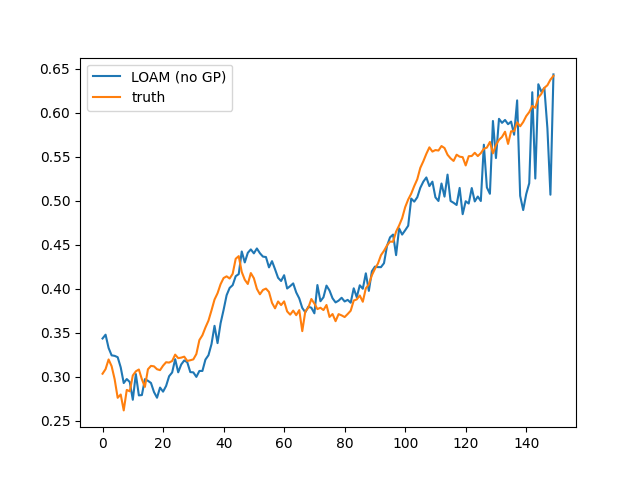

In [291]:
fig, ax = plt.subplots()

LOAM = np.loadtxt("KITTI_results/KITTI_LOAM.txt")
LOAM_noGP = np.loadtxt("KITTI_results/KITTI_LOAM_noGP.txt")
gt = np.loadtxt("KITTI_results/OXTS_baseline.txt")

# ax.plot(LOAM[:,0], label = "LOAM")
ax.plot(LOAM_noGP[:,0], label = "LOAM (no GP)")
ax.plot(gt[:,0], label = "truth")
plt.legend()

In [274]:
#test removing points too close to the center from scan2 in cartesian ICET
#   DEBUGGING GROUND PLANE NEAR EGO-VEHICLE

t = np.linspace(0,11,12)
t = t.reshape([4,3])
print(t, "\n")

# print(t[t<3])
dist = np.sum(t**2, axis = 1)
print(t[dist < 100])

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]] 

[[0. 1. 2.]
 [3. 4. 5.]]


In [4]:
#test - why does cov[0,0] give different results than std?????
#  answer: https://stackoverflow.com/questions/51923846/why-correlation-computed-by-nump-cov-and-np-std-is-different-from-the-result
# C = np.cov(est[:,0],est[:,1], ddof = 0) #need to include ddof arg
C = np.cov(est.T, ddof = 0) #need to include ddof arg
print(np.sqrt(abs(C)))

[[2.10680890e-03 6.27288063e-04 2.23612424e-05 5.36261049e-05
  5.75751343e-05 3.02715414e-05]
 [6.27288063e-04 2.61698970e-04 6.97642712e-05 3.34985040e-05
  1.86858160e-05 1.42138840e-05]
 [2.23612424e-05 6.97642712e-05 1.18280401e-04 1.74853437e-05
  1.80373831e-05 1.47248693e-05]
 [5.36261049e-05 3.34985040e-05 1.74853437e-05 3.42635735e-05
  8.86463461e-07 7.75656069e-06]
 [5.75751343e-05 1.86858160e-05 1.80373831e-05 8.86463461e-07
  3.01380137e-05 4.17262252e-06]
 [3.02715414e-05 1.42138840e-05 1.47248693e-05 7.75656069e-06
  4.17262252e-06 1.93715878e-05]]


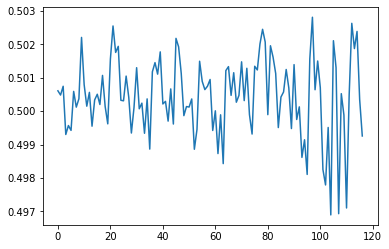

In [74]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(est[:,0])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


<IPython.core.display.Javascript object>


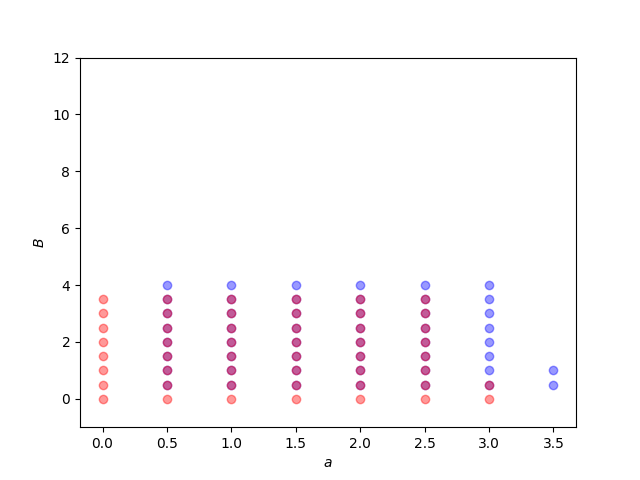

In [77]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#test indexing for spherical paper
npts = 50
x = np.linspace(0, npts-1, npts)
# x = np.linspace(1, npts, npts)
# print(x)
fig, ax = plt.subplots()
ax.set_ylim([-1,12])
ax.set_xlabel('$a$')
ax.set_ylabel('$B$')

ang_min = 0
ang_max = 4
deltaA = 0.5
deltaB = 0.5

for n in x:
    #horizontal angle (drawn left/ right here)
    num_vert_bins = (ang_max-ang_min)/deltaB #- 1
    a_min = (np.floor(n/num_vert_bins))*(deltaA)
    a_max = (1 + np.floor(n/num_vert_bins))*(deltaA)
    
    #elevation angle
    b_min = deltaB*(n%num_vert_bins)
    b_max = deltaB*(n%num_vert_bins + 1)

    ax.scatter(a_min, b_min, c = 'red', alpha = 0.4)
    ax.scatter(a_max, b_max, c = 'blue', alpha = 0.4)

    # print(int(num_vert_bins), "vertical bins")
